In [103]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import scipy.sparse

np.set_printoptions(precision = 4)

In [104]:
Ph300 = scipy.io.loadmat('Ph300.mat')
Ph500 = scipy.io.loadmat('Ph500.mat')

ph300 = np.asarray(scipy.sparse.csc_matrix.todense(Ph300['Ph300']))
ph500 = np.asarray(scipy.sparse.csc_matrix.todense(Ph500['Ph500']))

### Funkcija koja iz vektora permutacije generira matricu permutacija

In [105]:
def permmat(vektor):
    n = vektor.size
    mat = np.zeros((n,n))
    for i in range(n):
        mat[i][vektor[i]] = 1
    return mat

### Funkcija $\mathbb{1}$-norme

In [106]:
def norma(B):
    n = max(B.shape)
    if(n == 0):
        return 0
    suma = np.sum(B);
    return suma/n

### Funkcija korak

Funkcija koja provjeri je li daljnja dekompozicija moguća, prima podmatricu B i threshold te vraća odgovarajuću podjelu, zajedno s flagom je li podjela moguća ili ne.

In [107]:
def korak(B, thr):
    u,s,v = np.linalg.svd(B)
    vektor = u[:,1]
    
    n1 = sum(vektor <= 0)
    n2 = sum(vektor > 0)
    
    n = n1+n2

    P = permmat(np.argsort(vektor))
    Bnew = P @ B @ np.transpose(P)
    
    if(norma(Bnew[0:n1,0:n1]) > thr and norma(Bnew[n1:n,n1:n]) > thr):
        return P, n1, n2, 0
    else:
        return P, n1, n2, 1

### Glavna funkcija
Prvo provjerimo možemo li raditi daljnju bisekciju, ako ne možemo, vratimo što imamo, ako možemo, rekurzivno podijelimo podmatrice

In [108]:
def SVDmetastable(B, thr):
    n = max(B.shape)
    blokovi = []
    permutacija = np.eye(n)
    
    P, n1, n2, flag = korak(B, thr)
    
    if(flag == 1):
        #Ne možemo dalje rastavljat
        blokovi.insert(0,n)
        return blokovi, permutacija
    else:
        permutacija = P@permutacija
        B = P @ B @ np.transpose(P)
        
        blok1, perm1 = SVDmetastable(B[0:n1,0:n1], thr)
        blok2, perm2 = SVDmetastable(B[n1:n,n1:n], thr)
        
        pomp = np.zeros((n,n))
        pomp[0:n1, 0:n1] = perm1
        pomp[n1:n, n1:n] = perm2
        
        permutacija = pomp @ permutacija
        blokovi = blok1 + blok2
        
        return blokovi, permutacija

## Primjeri

[47, 20, 42, 24, 36, 46, 40]


Text(0.5, 1.0, 'Poslije algoritma, thr = 0.5')

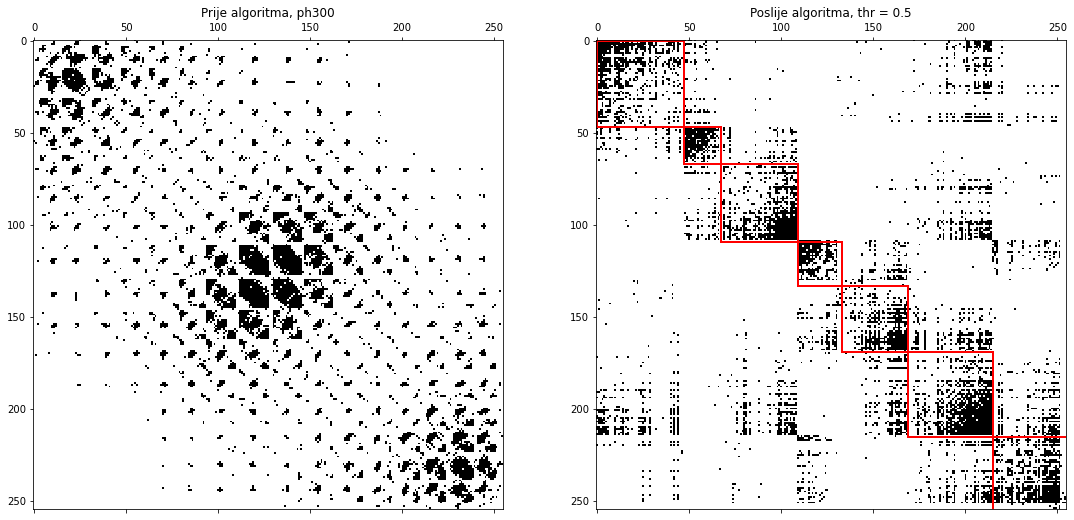

In [111]:
thr = .5

blokovi, P = SVDmetastable(ph300,thr)

ph = P @ ph300 @ np.transpose(P)

m = len(blokovi)
print(blokovi)
pozicije = (np.cumsum(blokovi))

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18.5, 10.5)
ax1.spy(ph300)
ax1.set_title("Prije algoritma, ph300")
ax2.spy(ph)
for i in range(m):
    d = blokovi[i]
    poz = pozicije[i]
    rect = patches.Rectangle((poz, poz), -d, -d, linewidth=2, edgecolor='r', facecolor='none')
    ax2.add_patch(rect)
ax2.set_title("Poslije algoritma, thr = 0.5")

[71, 88, 37, 51, 60]


Text(0.5, 1.0, 'Poslije algoritma, thr = 0.5')

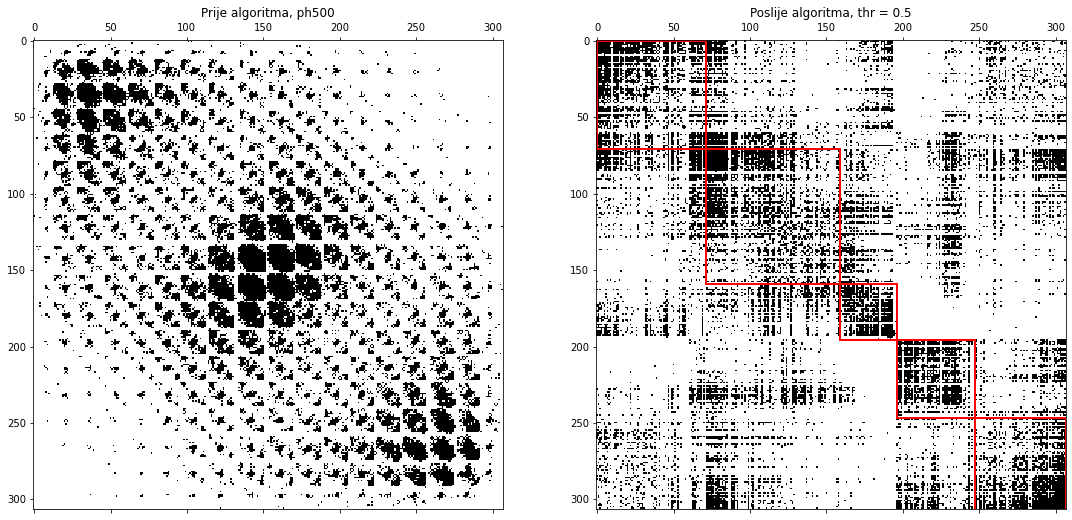

In [112]:
thr = .5

blokovi, P = SVDmetastable(ph500,thr)

ph = P @ ph500 @ np.transpose(P)

m = len(blokovi)
print(blokovi)

pozicije = (np.cumsum(blokovi))

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18.5, 10.5)
ax1.spy(ph500)
ax1.set_title("Prije algoritma, ph500")
ax2.spy(ph)
for i in range(m):
    d = blokovi[i]
    poz = pozicije[i]
    rect = patches.Rectangle((poz, poz), -d, -d, linewidth=2, edgecolor='r', facecolor='none')
    ax2.add_patch(rect)
ax2.set_title("Poslije algoritma, thr = 0.5")